<a href="https://colab.research.google.com/github/bikilath/Twitter-Sentimetal-Analysis/blob/main/TSA_SVM_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####3. Twitter Sentiment Analysis Using Support Vector Machines (SVM) Methods
- Analyze the use of SVM methods for classifying sentiments in Twitter data.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import time

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df  = pd.read_csv('/content/drive/My Drive/SA.csv',encoding='latin-1', header=None, names=["target", "ids", "date", "flag", "user", "text"])

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
start_time = time.time()
vectorizer = TfidfVectorizer(max_features=15000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print("TF-IDF Vectorization Time:", time.time() - start_time)

TF-IDF Vectorization Time: 23.82892370223999


In [ ]:
# SVM Model
start_time = time.time()
svm = LinearSVC()
svm.fit(X_train_vectorized, y_train)
print("Model Training Time:", time.time() - start_time)

Model Training Time: 25.96069359779358


In [ ]:
# Predictions
start_time = time.time()
y_pred = svm.predict(X_test_vectorized)
print("Prediction Time:", time.time() - start_time)

Prediction Time: 0.016703128814697266


In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8497825630853154


In [ ]:
!pip install scikit-learn==1.2.2

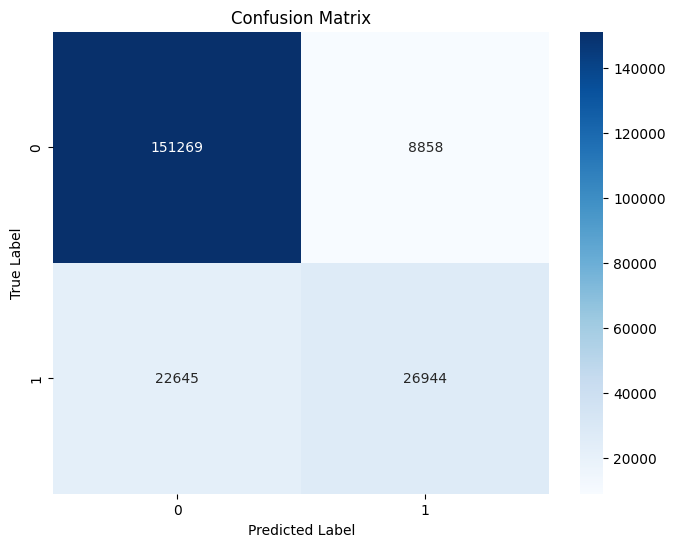

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

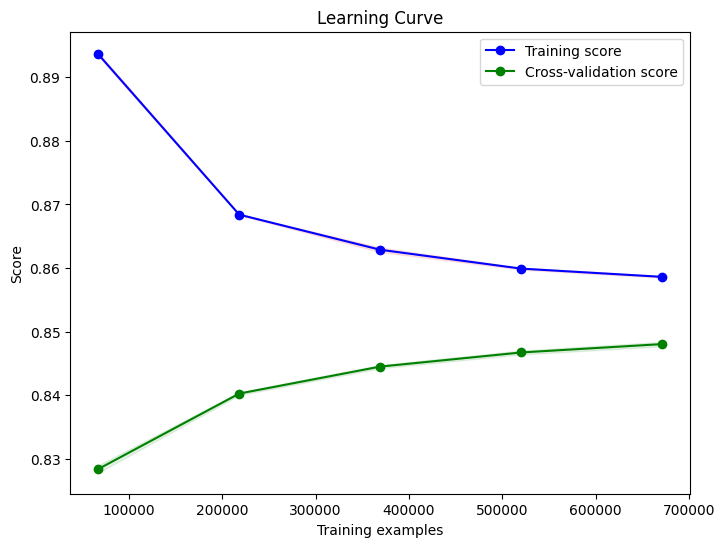

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svm, X_train_vectorized, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

<ipython-input-100-8a15eca5ca9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=feature_importance[sorted_indices], palette="viridis")


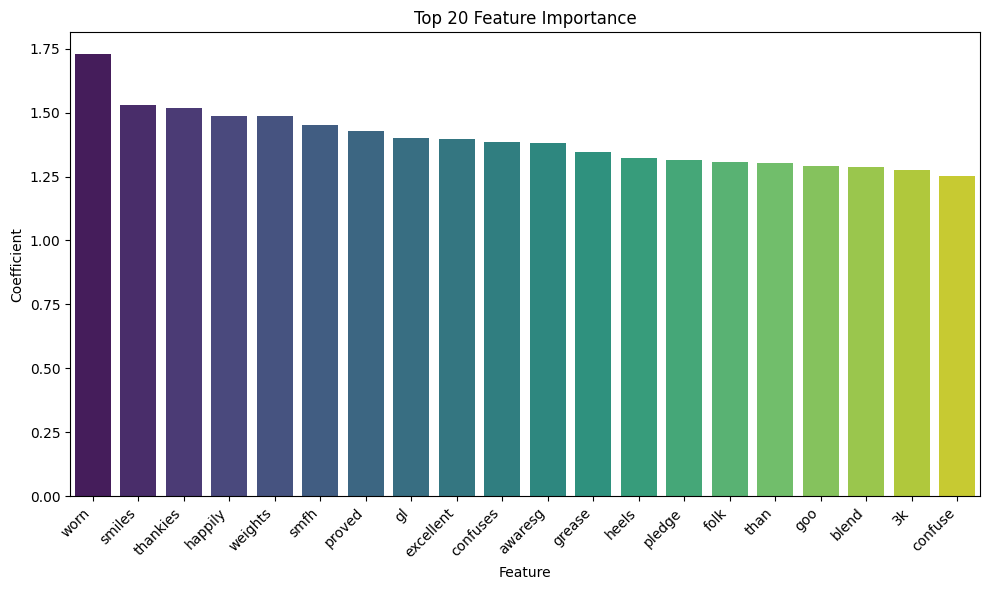

In [ ]:
# Feature Importance (for Linear SVM)
feature_importance = best_model.coef_[0]
sorted_indices = feature_importance.argsort()[::-1][:20]  # Top 20 features
#top_features = np.array(vectorizer.get_feature_names())[sorted_indices]
top_features = np.array(vectorizer.get_feature_names_out())[sorted_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=feature_importance[sorted_indices], palette="viridis")
plt.title("Top 20 Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, classification_report

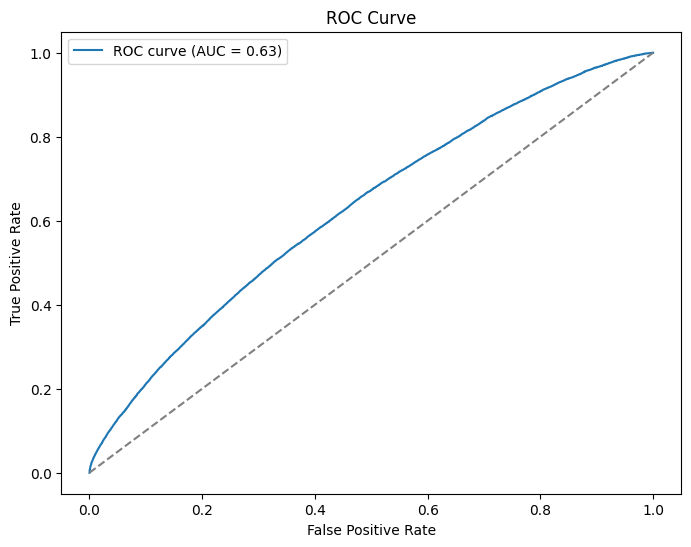

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, classification_report
from sklearn.metrics import roc_curve
y_test = y_test.astype(int)
# Modify the code to handle the specific values in y_test
# For example, if y_test contains values 0 and 4, you can use the following code:

y_test = y_test.replace({0: -1, 4: 1})
# ROC Curve and AUC Score
y_scores = best_model.decision_function(X_test_vectorized)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_scores)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


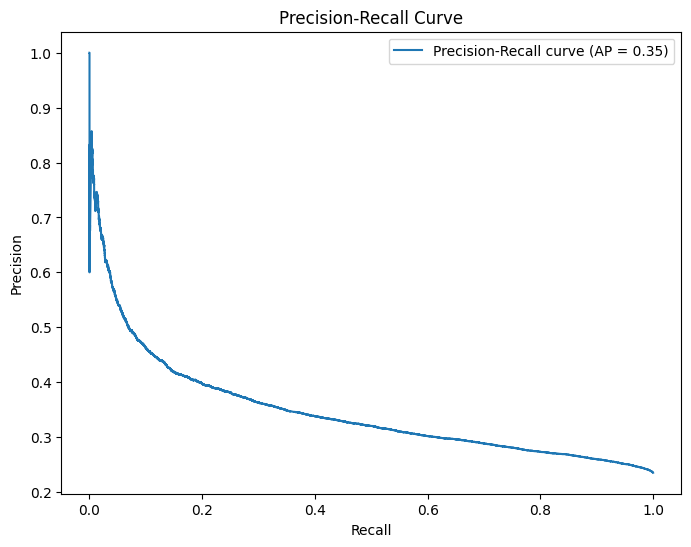

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_score(y_test, y_scores)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

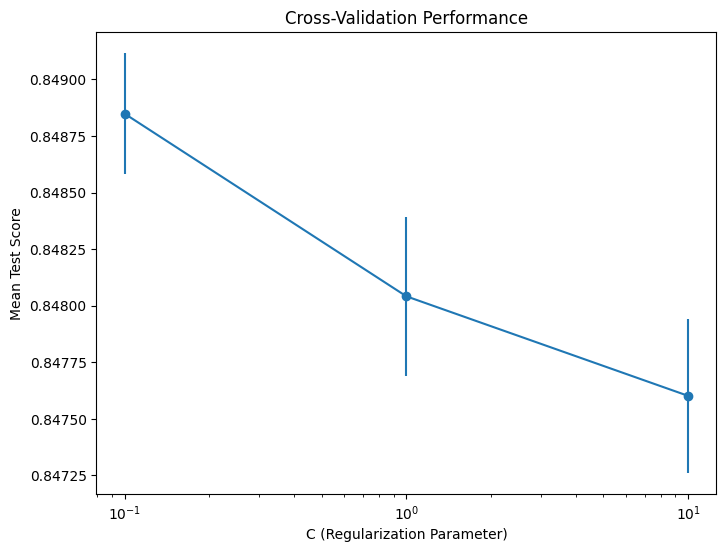

In [ ]:
# Cross-Validation Performance
cv_results = grid_search.cv_results_
plt.figure(figsize=(8, 6))
plt.errorbar(param_grid['C'], cv_results['mean_test_score'], yerr=cv_results['std_test_score'], fmt='-o')
plt.title('Cross-Validation Performance')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Score')
plt.xscale('log')
plt.show()

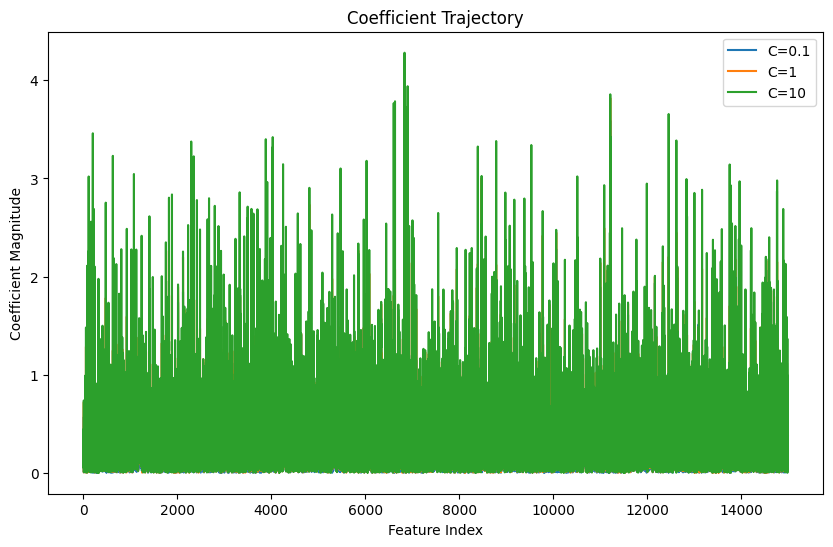

In [ ]:
# Coefficient Trajectory
coefficients = []
for C in param_grid['C']:
    svm = LinearSVC(C=C)
    svm.fit(X_train_vectorized, y_train)
    coefficients.append(svm.coef_.ravel())

plt.figure(figsize=(10, 6))
for i in range(len(param_grid['C'])):
    plt.plot(np.abs(coefficients[i]), label=f'C={param_grid["C"][i]}')
plt.title('Coefficient Trajectory')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predictions
start_time = time.time()
y_pred = svm.predict(X_test_vectorized)
print("Prediction Time:", time.time() - start_time)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Prediction Time: 0.014676809310913086
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91    160127
           4       0.75      0.54      0.63     49589

    accuracy                           0.85    209716
   macro avg       0.81      0.74      0.77    209716
weighted avg       0.84      0.85      0.84    209716



In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions
start_time = time.time()
y_pred = svm.predict(X_test_vectorized)
print("Prediction Time:", time.time() - start_time)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Prediction Time: 0.024322032928466797
Confusion Matrix:
[[151269   8858]
 [ 22645  26944]]


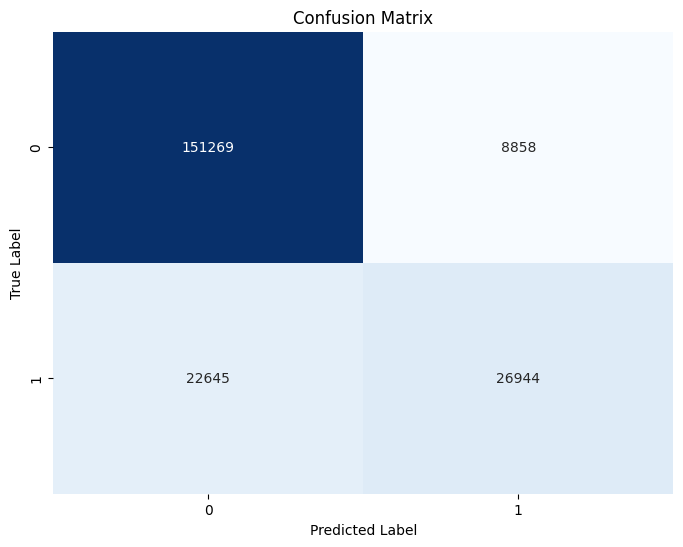

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


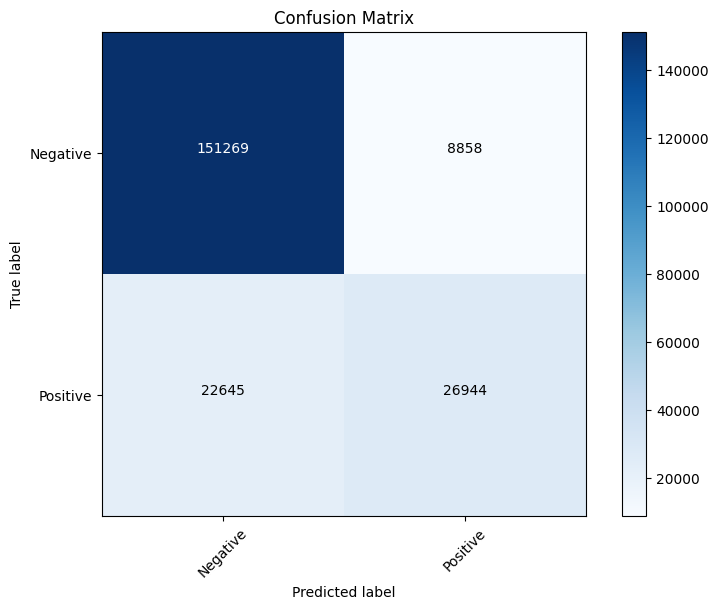

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['Negative', 'Positive']  # Replace with your class labels if different
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values within the cells
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Confusion matrix, without normalization
Normalized confusion matrix


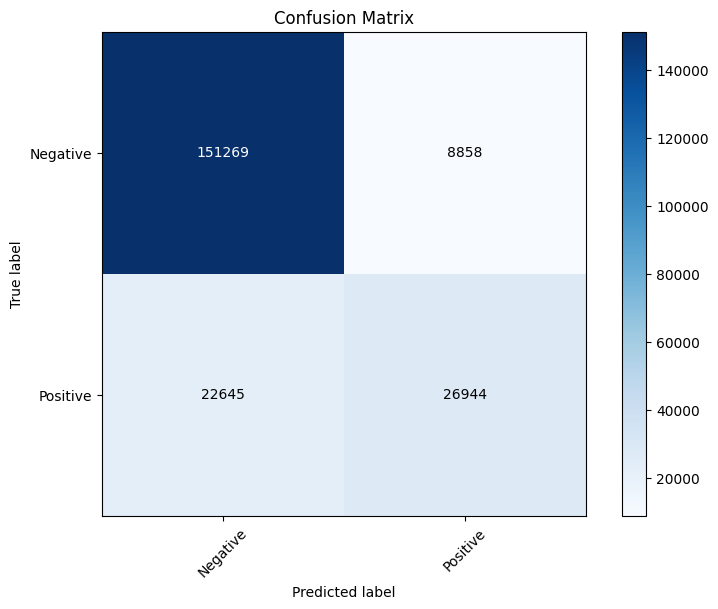

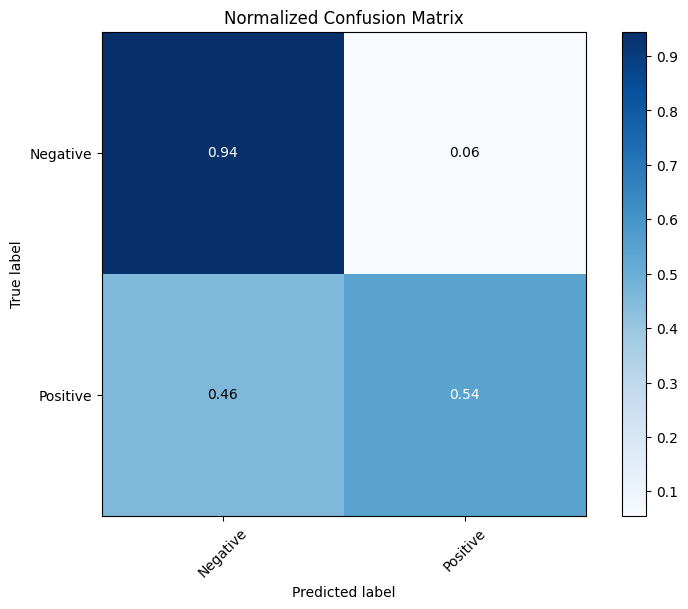

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=['Negative', 'Positive'], title='Confusion Matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')

plt.show()


Confusion matrix, without normalization
Normalized confusion matrix


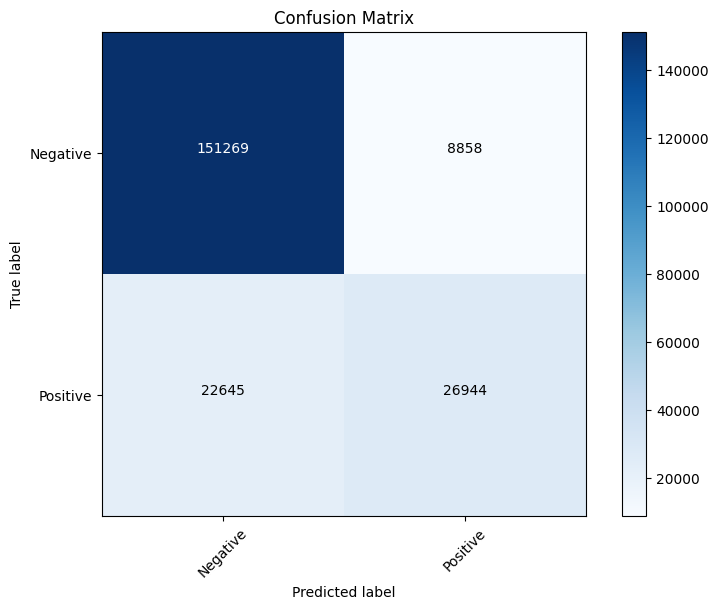

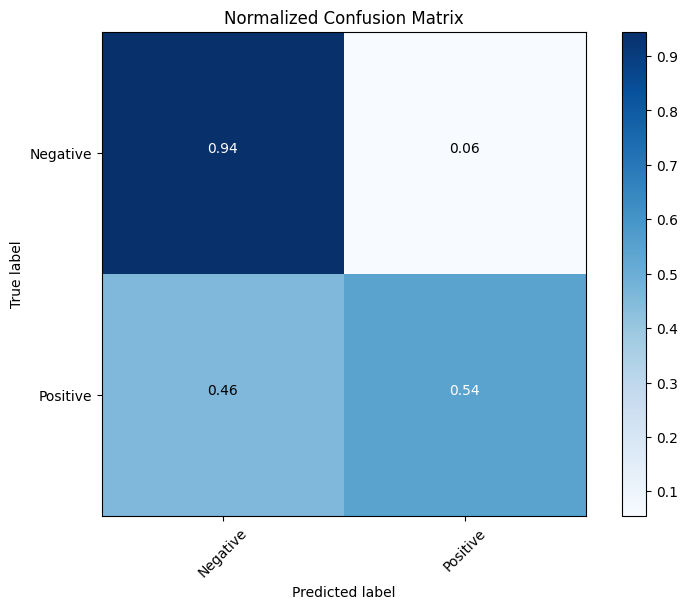

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=['Negative', 'Positive'], title='Confusion Matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')

plt.show()